# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Presidential-Debate-Open-Questions-Analysis" data-toc-modified-id="Presidential-Debate-Open-Questions-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Presidential Debate Open Questions Analysis</a></div><div class="lev2 toc-item"><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></div><div class="lev3 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev2 toc-item"><a href="#Create-DataFrame-for-Questions-by-State-Analysis" data-toc-modified-id="Create-DataFrame-for-Questions-by-State-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create DataFrame for Questions-by-State Analysis</a></div><div class="lev2 toc-item"><a href="#Extract-and-Save-Corpora" data-toc-modified-id="Extract-and-Save-Corpora-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Extract and Save Corpora</a></div><div class="lev2 toc-item"><a href="#Phrase-Modeling" data-toc-modified-id="Phrase-Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phrase Modeling</a></div><div class="lev3 toc-item"><a href="#Apply-our-first-order-phrase-model-to-join-word-pairs" data-toc-modified-id="Apply-our-first-order-phrase-model-to-join-word-pairs-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Apply our first-order phrase model to join word pairs</a></div><div class="lev3 toc-item"><a href="#Applying-our-second-order-phrase-model-to-join-longer-phrases" data-toc-modified-id="Applying-our-second-order-phrase-model-to-join-longer-phrases-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Applying our second-order phrase model to join longer phrases</a></div><div class="lev3 toc-item"><a href="#Remove-stopwords" data-toc-modified-id="Remove-stopwords-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Remove stopwords</a></div><div class="lev3 toc-item"><a href="#Add-final-corpus-to-grouped-by-states-and-submitters-DataFrames" data-toc-modified-id="Add-final-corpus-to-grouped-by-states-and-submitters-DataFrames-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Add final corpus to grouped-by states and submitters DataFrames</a></div><div class="lev2 toc-item"><a href="#Export-DataFrames" data-toc-modified-id="Export-DataFrames-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Export DataFrames</a></div><div class="lev2 toc-item"><a href="#Topic-Modeling-with-Latent-Dirichlet-Allocation-(LDA)" data-toc-modified-id="Topic-Modeling-with-Latent-Dirichlet-Allocation-(LDA)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Topic Modeling with Latent Dirichlet Allocation (LDA)</a></div><div class="lev3 toc-item"><a href="#Parameters-to-tweak-for-LDA" data-toc-modified-id="Parameters-to-tweak-for-LDA-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Parameters to tweak for LDA</a></div><div class="lev3 toc-item"><a href="#Create-a-bag-of-words-representation" data-toc-modified-id="Create-a-bag-of-words-representation-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Create a bag-of-words representation</a></div><div class="lev3 toc-item"><a href="#Implement-LDA-topic-modeling" data-toc-modified-id="Implement-LDA-topic-modeling-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Implement LDA topic modeling</a></div><div class="lev2 toc-item"><a href="#Visualzing-topics-with-pyLDAviz" data-toc-modified-id="Visualzing-topics-with-pyLDAviz-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Visualzing topics with pyLDAviz</a></div>

# Presidential Debate Open Questions Analysis

Scraped from [Presidential Debate Open Questions][1] after debate October 9, 2016 at 11pm

Instructions for contributors, login required to post:

<img src="./images/poq_instructions_screenshot.jpg" 
alt="instructions screenshot" align="left"/>

[1]:https://presidentialopenquestions.com/watch/

Exported DataFrames of data preprocessed in this notebook can be accessed elsewhere with:
```python
pd.read_csv('./exported/questions_by_submitter_df_export.txt', index_col=0)
pd.read_csv('./exported/questions_by_state_df_export.txt', index_col=0)
```

In [1]:
import codecs
import json
from pprint import pprint
from IPython.display import display
import pandas as pd
import string, os

with open('data/data_20161016_2159_all.json') as f:    
    data = json.load(f)
    
df = pd.DataFrame(data)
df = df.drop(['issue_path', 'question_path'], axis=1)
df['submission_date'] = pd.to_datetime(df['submission_date'])
df['submitter_location'].fillna('None', inplace=True)

start_date = df['submission_date'].max()
end_date = df['submission_date'].min()
date_range = start_date - end_date
display(pd.DataFrame([[start_date, end_date, date_range]], 
                     columns=['start date', 'end date', 'date range']))

display(df.head(3))
display(df.tail(3))

,start date,end date,date range
0,2016-10-09 19:31:00,2016-09-26 12:41:00,13 days 06:50:00


,issue_area,question,submission_date,submitter_location,submitters,vote_count
0,Economy & Jobs,"What, if anything, do you plan to do to ensure...",2016-10-09 18:51:00,CT,Stephanie C.,1
1,Society & Community,Funding for more police officers and better tr...,2016-10-09 19:28:00,FL,Donna T.,1
2,Civil Rights,Can you change the FCCâs news distortion po...,2016-10-09 17:44:00,NV,jim m.,1
3,Foreign Policy & Military,"What would any of you think the passing of ""JA...",2016-10-08 12:52:00,TX,Edgar G.,1
4,Health,Would you commit to ending the Cadillac Tax on...,2016-10-08 13:28:00,NY,Ken W.,1


,issue_area,question,submission_date,submitter_location,submitters,vote_count
15885,Education,Explain why greed is In business and educatio...,2016-10-09 16:48:00,MA,Mark B.,1
15886,Health,What are your thoughts on abortion?,2016-10-09 19:25:00,SD,Jerricka T.,1
15887,Foreign Policy & Military,How will you defeat ISIS and protect the USA f...,2016-10-09 18:59:00,FL,Chuck B.,1
15888,Society & Community,"Other than immigration, what issue is your nex...",2016-10-09 18:13:00,NV,Maria P.,1
15889,Foreign Policy & Military,What will you do to ensure a truly sovereign a...,2016-10-09 17:48:00,IL,Peter R.,1


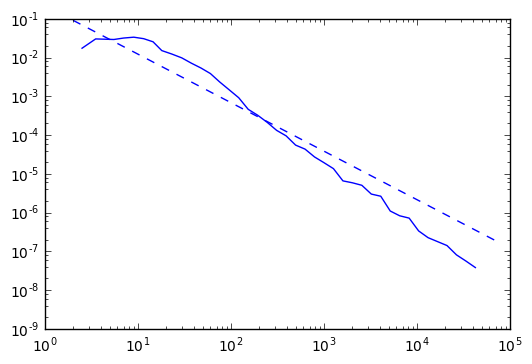

alpha=  1.25169123624   sigma=  0.00199666932227


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import powerlaw
import numpy as np

fit = powerlaw.Fit(np.array(df['vote_count'])+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf(color= 'b')
plt.show()

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

## Preprocessing

### Data cleaning

In [3]:
from copy import deepcopy
# df_original = deepcopy(df)  # for reference, can comment out

In [4]:
# drop exact duplicates, likely there from over-scraping
n_exact_dupes = sum(df.duplicated())
df = df.drop_duplicates().reset_index(drop=True)
print('... dropped {} exact duplicates.'
      .format(n_exact_dupes))

# summary of duplicate information
sum_questions = len(df)
print('total questions: {}'.format(sum_questions))

sum_all_votes = df['vote_count'].sum()
print('total votes: {}'.format(sum_all_votes))

print()

# total votes for dupes, relevant for vote-question, state-agnostic analysis
are_duplicates = df.duplicated('question', keep=False)
n_dupes = sum(are_duplicates)
print('total duplicate questions: {} ({:.2%})'.format(
       n_dupes, n_dupes/sum_questions))

sum_dupe_votes = sum(df.loc[are_duplicates, 'vote_count'])
print('votes across duplicate questions: {} ({:.2%})'.format(
       sum_dupe_votes, sum_dupe_votes/sum_all_votes))
print()

# total votes for dupes that split across two or more states, relevant if 
# votes for questions are compared on a state-by-state basis
are_duped_by_question = df.duplicated('question', keep=False)
are_duped_by_q_and_state = df.duplicated(['question', 'submitter_location'],
                                         keep=False)
are_duped_with_diff_states = are_duped_by_question ^ are_duped_by_q_and_state

n_dupes_diff_states = (sum(are_duped_with_diff_states))
print('duplicate questions with differing states: {} ({:.2%})'.format(
       n_dupes_diff_states, 
       n_dupes_diff_states/sum_questions))

sum_dupe_votes_diff_states = sum(df.loc[are_duped_with_diff_states, 
                                        'vote_count'])
print('votes across duplicate questions with differing states: {} ({:.2%})'.format(
       sum_dupe_votes_diff_states, sum_dupe_votes_diff_states/sum_all_votes))

... dropped 27 exact duplicates.
total questions: 15863
total votes: 3462952

total duplicate questions: 217 (1.37%)
votes across duplicate questions: 161241 (4.66%)

duplicate questions with differing states: 54 (0.34%)
votes across duplicate questions with differing states: 155847 (4.50%)


NOTE: These duplicates will impact aggregate-vote analysis!

## Create DataFrame for Questions-by-State Analysis

In [5]:
def qs_for_state(questions_df, state, q_col):
    '''
    generator function that yields unescaped 
    questions for a given state.
    '''
    
    df = questions_df
    for i, row in df[df['submitter_location']==state].iterrows():
        q = row[q_col]
        q = q.replace('\n', ' ')
        q = q.replace('\r', ' ')
        yield q + '\n'  # normalized to one line per question

def states_q_data(questions_df, states, q_col):
    '''
    generator function that yields document
    of questions that originate from a 
    given state.
    '''
        
    for state in states:
        yield (state, ' '.join(qs_for_state(questions_df, state, q_col)))

def combine_qs_for_states(source_df, states_list, 
                          incl_none=True, q_col='question'):
    '''
    constructs new Dataframe with each row
    consisting of a state column and a column
    for all questions from that state combined
    into a single document.
    '''
    if incl_none and 'None' not in states_list:
        states_list += ['None']
    
    combined_qs = pd.DataFrame(states_q_data(source_df, states_list, q_col), 
                               columns=['state', q_col])
    combined_qs = combined_qs.set_index('state')
    
    return combined_qs

In [6]:
data_directory = os.path.join('.', 'data')
states_data_filepath = os.path.join(data_directory,
                                    'state_combined_list.json')

with open(states_data_filepath) as f:    
        states_data = json.load(f)

# new df with state info
df_states = pd.DataFrame(states_data,
                         columns=['state', 'adult_pop', 'partisanship'])
df_states = df_states.set_index('state')

# add column for question count for each state
df_states = df_states.join(df['submitter_location'].value_counts())
df_states.columns = (df_states.columns
                     .str.replace('submitter_location','q_count'))

# add column for document of all questions from a state (combined)
df_states = df_states.join(
    combine_qs_for_states(df, list(df_states.index)), how='right')

## Extract and Save Corpora

In [7]:
import os

def verify_all_docs_written_to_file(source_df, filepath):
    '''
    provides printed verification that the number of documents 
    in the corpus text file matches total number of questions 
    or states depending on the grouping.
    '''
    
    with codecs.open(filepath, encoding='utf_8') as f:
        for actual, _ in enumerate(f):
            pass
        
    expected = len(source_df)
    actual += 1  # some count adjustment
    if actual == len(source_df):
        return ('All {} documents written to file, one per line.'
                .format(actual))
    else:
        return ('Oops! Wrote {} lines to file instead of {}'
                .format(actual, expected))   

def extract_save_corpus(source_df, filepath, q_col='question'):
    '''
    extracts questions from a DataFrame into documents, 
    each document representing a single question or all 
    questions for a state, and saves corpus as text file.
    '''
    
    with open(filepath, 'w') as f:
        for q in source_df['question']:
            q = q.replace('\n', ' ')
            q = q.replace('\r', ' ')
            f.write(q + '\n')  # normalized to one line per document

In [8]:
intermediate_directory = os.path.join('.', 'intermediate')
submitters_questions_filepath = os.path.join(intermediate_directory,
                                          'raw_questions.txt')

extract_save_corpus(df, submitters_questions_filepath)
print(verify_all_docs_written_to_file(df, submitters_questions_filepath))

All 15863 documents written to file, one per line.


## Phrase Modeling

In [9]:
# Remove punctuation and lemmatize the text
import spacy
import pandas as pd

nlp = spacy.load('en')

unigram_questions_filepath = os.path.join(intermediate_directory,
                                          'unigram_questions.txt')
bigram_questions_filepath = os.path.join(intermediate_directory,
                                         'bigram_questions.txt')
trigram_questions_filepath = os.path.join(intermediate_directory,
                                          'trigram_questions.txt')
trigram_transformed_filepath = os.path.join(intermediate_directory,
                                'trigram_transformed_questions.txt')

In [10]:
def punct_space(token):
    '''
    is the token pure punctuation or a space?
    '''
    
    return token.is_punct or token.is_space

def line_review(filepath):
    """
    reads in questions from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filepath, encoding='utf_8') as f:
        for question in f:
            yield question
            
def lemmatized_questions(filepath):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    for parsed_question in nlp.pipe(line_review(filepath), n_threads=4):
            yield u' '.join([token.lemma_ for token in parsed_question
                             if not punct_space(token)])

In [11]:
with open(unigram_questions_filepath, 'w') as f:
    for question in lemmatized_questions(submitters_questions_filepath):
        f.write(question + '\n')

print(verify_all_docs_written_to_file(df, unigram_questions_filepath))

All 15863 documents written to file, one per line.


### Apply our first-order phrase model to join word pairs

In [12]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

unigram_questions = LineSentence(unigram_questions_filepath, 
                                 max_sentence_length=100000)
bigram_model = Phrases(unigram_questions)


with open(bigram_questions_filepath, 'w', encoding='utf_8') as f:
        
    for unigram_question in unigram_questions:    
        bigram_questions = u' '.join(bigram_model[unigram_question])
        f.write(bigram_questions + '\n')

print(verify_all_docs_written_to_file(df, bigram_questions_filepath))    

All 15863 documents written to file, one per line.


### Applying our second-order phrase model to join longer phrases

In [13]:
bigram_questions = LineSentence(bigram_questions_filepath,
                                max_sentence_length=100000)
trigram_model = Phrases(bigram_questions)

with codecs.open(trigram_questions_filepath, 'w') as f:
        
        for bigram_question in bigram_questions:
            
            trigram_question = u' '.join(trigram_model[bigram_question])
            f.write(trigram_question + '\n')

print(verify_all_docs_written_to_file(df, trigram_questions_filepath))

All 15863 documents written to file, one per line.


### Remove stopwords

In [14]:
trigram_questions = LineSentence(trigram_questions_filepath,
                                max_sentence_length=100000)

with codecs.open(trigram_transformed_filepath, 'w', encoding='utf_8') as f:
    for trigram_question in trigram_questions:

        trigram_question = [term for term in trigram_question
                            if term not in spacy.en.STOPWORDS]

        # write the transformed review as a line in the new file
        trigram_question = u' '.join(trigram_question)
        f.write(trigram_question + '\n')

print(verify_all_docs_written_to_file(df, trigram_transformed_filepath))

All 15863 documents written to file, one per line.


### Add final corpus to grouped-by states and submitters DataFrames

In [15]:
trigram_transformed = line_review(trigram_transformed_filepath)
processed_questions = pd.Series(trigram_transformed, name='question_')

# unless already done, add processed questions as new column
if 'question_' not in df.columns:
    df = df.join(processed_questions)

display(df.tail())

if 'question_' not in df_states.columns:
    df_states = df_states.join(
        combine_qs_for_states(df, list(df_states.index), q_col='question_'))

display(df_states.tail())

# save transformed questions by state, in addition to by submitter done above
trigram_by_state_filepath = os.path.join(intermediate_directory,
                                         'trigram_transformed_by_state.txt')

extract_save_corpus(df_states, trigram_by_state_filepath, q_col='question_')
print(verify_all_docs_written_to_file(df_states, trigram_by_state_filepath))

,issue_area,question,submission_date,submitter_location,submitters,vote_count,question_
15858,Government & Elections,Would you act to repeal citizens united?,2016-09-27 14:17:00,CA,Ken B.,44742,act repeal citizen unite\n
15859,Environment,"As president, What are the steps you will take...",2016-09-27 12:06:00,DC,Joseph M.,46470,as_president step address climate_change\n
15860,Economy & Jobs,"Do you support expanding, and not cutting, Soc...",2016-09-28 11:07:00,NC,Ellen P.,46712,support expand cut social_security 's mod bene...
15861,Society & Community,How will you ensure the 2nd amendment is prote...,2016-09-27 11:11:00,None,Tim S.,65586,ensure 2nd_amendment protect\n
15862,Society & Community,Would you support requiring criminal backgroun...,2016-09-28 21:32:00,CA,Richard M.,75617,support require criminal background_check gun_...


,adult_pop,partisanship,q_count,question,question_
state,,,,,
WV,1464532,R,43.0,How open is either Candidate to Decriminalizin...,open either_candidate decriminalizing cannabis...
WI,4476711,S,245.0,How will your education agenda prepare student...,education agenda prepare student global societ...
WY,447212,R,60.0,Will you raise minimum raise to 50$\n Is the c...,raise minimum raise 50 $ \n current equivocati...
PR,2736791,,9.0,"If not elected, will you continue to fight fo...",elect continue fight campaign promises/plan \n...
None,NaN,NaN,NaN,What will your policy be toward Afghanistant i...,your_policy afghanistant if_elect term militar...


'All 53 documents written to file, one per line.'

## Export DataFrames

Exports can be loaded into a DataFrame with:
```python
pd.read_csv(filepath, index_col=0)
```

In [16]:
export_directory = './exported'
questions_by_submitter_df_export = os.path.join(export_directory,
                                    'questions_by_submitter_df_export.txt')

df.to_csv(questions_by_submitter_df_export)

questions_by_state_df_export = os.path.join(export_directory,
                                      'questions_by_state_df_export.txt')

df_states.to_csv(questions_by_state_df_export)

## Topic Modeling with Latent Dirichlet Allocation (LDA)

### Parameters to tweak for LDA

In [17]:
# for per question
NUM_TOPICS = 15
FILTER_BELOW = 2  # int for count, float for fraction of corpus size
FILTER_ABOVE = 1.  # int for count, float for fraction of corpus size

# for per state, needs model setup to be changed
# NUM_TOPICS = 4
# FILTER_BELOW = 3  # int for count, float for fraction of corpus size
# FILTER_ABOVE = .2  # int for count, float for fraction of corpus size

### Create a bag-of-words representation

In [18]:
trigram_transformed_questions = LineSentence(  # feeds array of unicode tokens
                                trigram_transformed_filepath,
                                max_sentence_length=100000)
trigram_dictionary_filepath = os.path.join(intermediate_directory,
                                           'trigram_dict_all.dict')

# learn the dictionary by iterating over all of the reviews
trigram_dictionary = Dictionary(trigram_transformed_questions)

# filter tokens that are very rare or too common
trigram_dictionary.filter_extremes(no_below=FILTER_BELOW,
                                   no_above=FILTER_ABOVE)
trigram_dictionary.filter_n_most_frequent(10)
trigram_dictionary.compactify()  # reassign int ids

In [19]:
trigram_bow_filepath = os.path.join(intermediate_directory,
                                    'trigram_bow_corpus_all.mm')

def trigram_bow_generator(filepath):
    """
    generator function to read questions from a file
    and yield a bag-of-words representation
    """
    
    for question in LineSentence(filepath, max_sentence_length=100000):
        yield trigram_dictionary.doc2bow(question)
        
# generate bag-of-words representations for
# all reviews and save them as a matrix
MmCorpus.serialize(trigram_bow_filepath,
                   trigram_bow_generator(trigram_questions_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

### Implement LDA topic modeling

In [20]:
import pyLDAvis
import pyLDAvis.gensim
import warnings
import pickle

lda_model_filepath = os.path.join(intermediate_directory, 'lda_model_all')

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    # workers => sets the parallelism, and should be
    # set to your number of physical cores minus one
    lda = LdaMulticore(trigram_bow_corpus,
                       num_topics=NUM_TOPICS,
                       id2word=trigram_dictionary,
                       workers=3,
                       random_state=42)

/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.sign

In [21]:
def explore_topic(topic_number, topn=10):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=topn):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [22]:
explore_topic(topic_number=3)

term                 frequency

pay                  0.012
climate_change       0.010
congress             0.009
president            0.007
federal              0.007
should_we            0.007
end                  0.006
public               0.006
ensure               0.005
supreme_court        0.005


In [23]:
def generate_document_topics(lda, filepath):
    for doc in trigram_bow_generator(filepath):
        yield lda.get_document_topics(doc, minimum_probability=.1)

In [38]:
enough_questions = df_states['q_count'] > 150

p = pd.DataFrame(generate_document_topics(lda, trigram_by_state_filepath), 
                 index=list(df_states.index))

df_states_t = df_states.join(p[[1,2]])
df_states_t[enough_questions].sort_values('partisanship').head()

,adult_pop,partisanship,q_count,question,question_,1,2
state,,,,,,,
MN,4205207,D,266.0,How do you feel about the bill letting familie...,feel_about let family sue saudi_arabia \n plea...,"(9, 0.121773913095)",None
CA,30023902,D,2123.0,How will you help transgender students \n Wher...,help transgender student \n stand_on genetical...,None,None
CT,2826827,D,202.0,"What, if anything, do you plan to do to ensure...",if_anything plan ensure happen \n support citi...,"(5, 0.128441723951)","(9, 0.137504863623)"
DC,554121,D,163.0,Whyhasn't there been discussion about reducti...,whyhasn't discussion reduction manuf job techn...,"(9, 0.136881486665)","(11, 0.106669705429)"
OR,3166121,D,317.0,How do you feel about tax fraud?\n As a Master...,feel_about tax fraud \n master 's student spec...,"(6, 0.17752351908)","(9, 0.12083599517)"


## Visualzing topics with pyLDAviz
For guide to what it means, see [documentation](https://pyldavis.readthedocs.io/en/latest/readme.html) or [video](https://youtu.be/tGxW2BzC_DU?t=2m55s)

In [ ]:
LDAvis_data_filepath = os.path.join(intermediate_directory, 'ldavis_prepared')

LDAvis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus,
                                          trigram_dictionary)

In [ ]:
pyLDAvis.display(LDAvis_prepared)